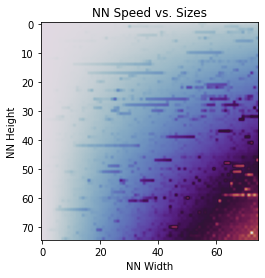

Mean Time = 1.23e-03 s, Median Time = 9.76e-04 s, St. Dv. = 9.67e-04 s


In [11]:
from main import *
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter as pc

# Sizes to test
maxHeight = 75
maxWidth = 75

# Make array to hold time values
times = np.zeros((maxHeight, maxWidth))

# Test different sizes and calculation times
repeats = 1
for h in range(maxHeight):
    for w in range(maxWidth):
        # Make net
        NN = AdvNet(1, [h+1]*(w+1), 1)

        # Make parameter count line close to 7640 (20x20)
        # if 6500 < NN.parameters and NN.parameters < 8500:
        #     times[h, w] = 3e-3
        #     continue

        # Single calculation time of [1]
        t1 = pc()
        for i in range(repeats):
            NN.Calculate(100)
        t2 = pc()
        
        # Add time results to array
        Dt = (t2 - t1) / repeats
        times[h, w] = Dt

NOTES = """
Basically from the heatmaps, it can be seen that if using some height H, then there should be about
W amount of hidden layers where W = H/10.

The converse can be said, though having H=W/10 seems to generally be a slightly slower design.

There is more of less of a line to stay around that is:
m = (75 - 1) / (1 - 20)
b = 75
Hieght = 3.89*Width + MaxD
Where MaxD is just the maximum dimension of either H or W that is going to be used.
"""

# Plot heat map of results
plt.imshow(times, cmap="twilight")
plt.title("NN Speed vs. Sizes")
plt.xlabel("NN Width")
plt.ylabel("NN Height")
plt.show()

# Some statistics on the results
times_mean = np.mean(times)
times_med  = np.median(times)
times_st   = np.std(times)
print(f"Mean Time = {times_mean:.2e} s, Median Time = {times_med:.2e} s, St. Dv. = {times_st:.2e} s")

In [10]:
from mcnets import *
AA = AdvNet(1, [12]*3, 1)
BB = AdvNet(1, [5]*13, 1)
print(AA)
print(BB)

              Neural Net Characteristics:               
            Layer Sizes = [1, 12, 12, 12, 1]            
      Weight Medians = [-0.12, -0.0, -0.0, -0.26]       
                  # of Parameters: 312                  
              Neural Net Characteristics:               
Layer Sizes = [1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1]
Weight Medians = [0.03, -0.01, -0.0, -0.08, 0.13, 0.11, -0.04, 0.06, 0.03, -0.19, 0.03, -0.15, 0.09, 0.23]
                  # of Parameters: 310                  


In [27]:
from time import perf_counter as pc

r = 10000

t1 = pc()
for i in range(r):
    AA.Calculate(100)
T1 = (pc() - t1) / r
T1 = format(T1, ".2e")

t2 = pc()
for i in range(r):
    BB.Calculate(100)
T2 = (pc() - t2) / r
T2 = format(T2, ".2e")

print(T1, T2)

4.89e-05 1.22e-04
